# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
df= pd.read_csv("TSLA.csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df,x="Date",y="Close")

In [ ]:
px.line(df,x="Date",y="Close")

In [ ]:
px.bar(df,x="Date",y="Volume")

In [ ]:
px.area(df,x="Date",y="Volume")

In [ ]:
## Shows statistical view. Does not require x axis value.
px.box(df,y="Close")


# Understanding Facebook Prophet

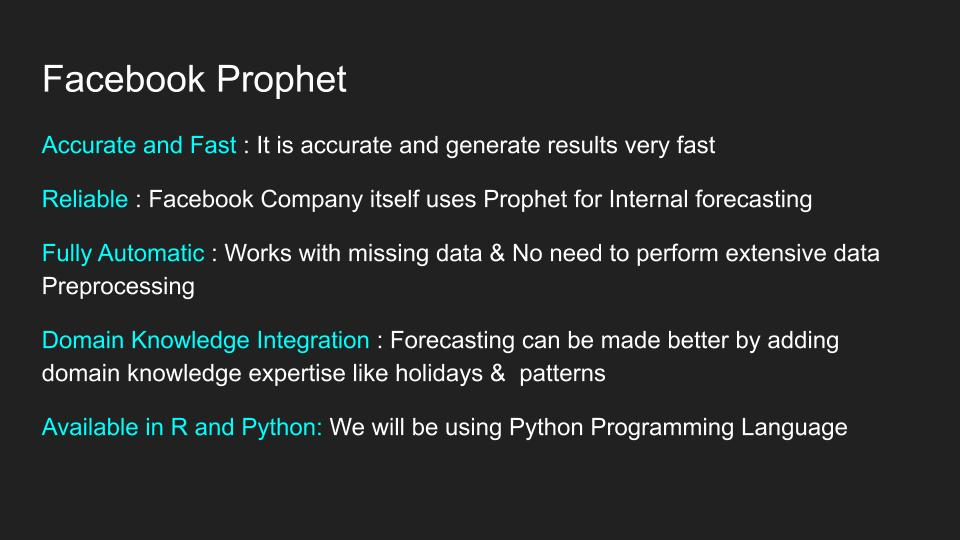

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [ ]:
columns=['Date','Close']
ndf=pd.DataFrame(df,columns=columns)

In [ ]:
ndf

,Date,Close
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


In [ ]:
prophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


## Creating Facebook Prophet Model

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp7guo6i/4nj6p_59.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqp7guo6i/7qqfalp8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44561', 'data', 'file=/tmp/tmpqp7guo6i/4nj6p_59.json', 'init=/tmp/tmpqp7guo6i/7qqfalp8.json', 'output', 'file=/tmp/tmpqp7guo6i/prophet_modeljjw8om7s/prophet_model-20230917042627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:26:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:26:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.594691,-23.139525,147.884055,65.594691,65.594691,-5.865357,-5.865357,-5.865357,-5.865357,-5.865357,-5.865357,0.0,0.0,0.0,59.729334
1,2020-03-17,67.390182,-18.727494,154.476596,67.390182,67.390182,-2.385994,-2.385994,-2.385994,-2.385994,-2.385994,-2.385994,0.0,0.0,0.0,65.004188
2,2020-03-18,69.185673,-16.743127,147.137941,69.185673,69.185673,-3.495425,-3.495425,-3.495425,-3.495425,-3.495425,-3.495425,0.0,0.0,0.0,65.690247
3,2020-03-19,70.981163,-14.714807,159.082573,70.981163,70.981163,-3.844488,-3.844488,-3.844488,-3.844488,-3.844488,-3.844488,0.0,0.0,0.0,67.136675
4,2020-03-20,72.776654,-18.671239,143.508651,72.776654,72.776654,-7.762047,-7.762047,-7.762047,-7.762047,-7.762047,-7.762047,0.0,0.0,0.0,65.014607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.282430,805.941973,986.062088,899.058904,901.491355,-3.495425,-3.495425,-3.495425,-3.495425,-3.495425,-3.495425,0.0,0.0,0.0,896.787005
277,2021-04-08,902.739493,815.006172,987.379683,901.441912,904.056814,-3.844488,-3.844488,-3.844488,-3.844488,-3.844488,-3.844488,0.0,0.0,0.0,898.895005
278,2021-04-09,905.196556,813.924310,979.204136,903.800238,906.591248,-7.762047,-7.762047,-7.762047,-7.762047,-7.762047,-7.762047,0.0,0.0,0.0,897.434509
279,2021-04-10,907.653619,823.700398,1003.636216,906.166847,909.119145,11.676654,11.676654,11.676654,11.676654,11.676654,11.676654,0.0,0.0,0.0,919.330272


In [ ]:
px.area(forecast,x='ds',y='yhat')

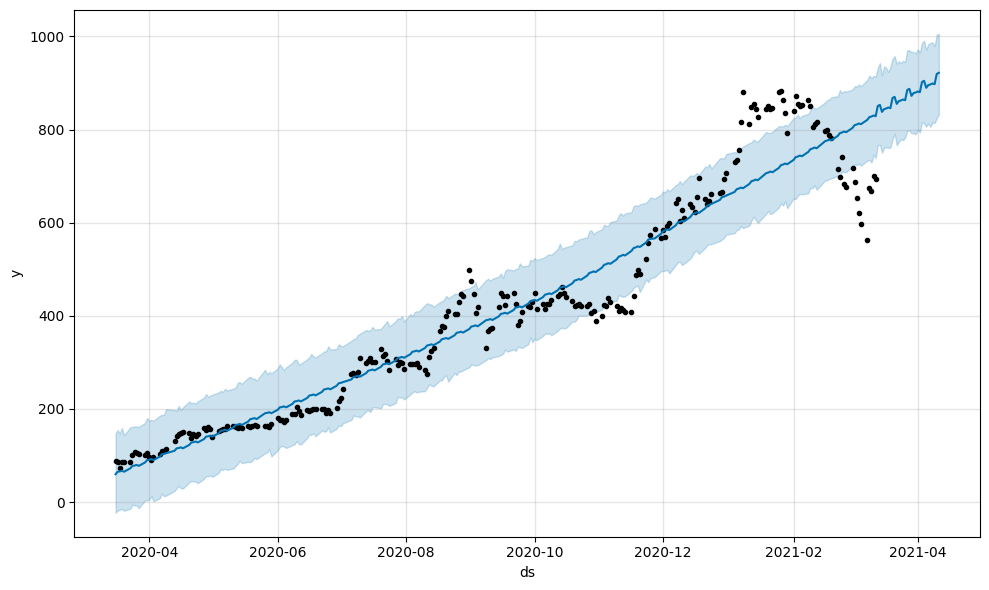

In [ ]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

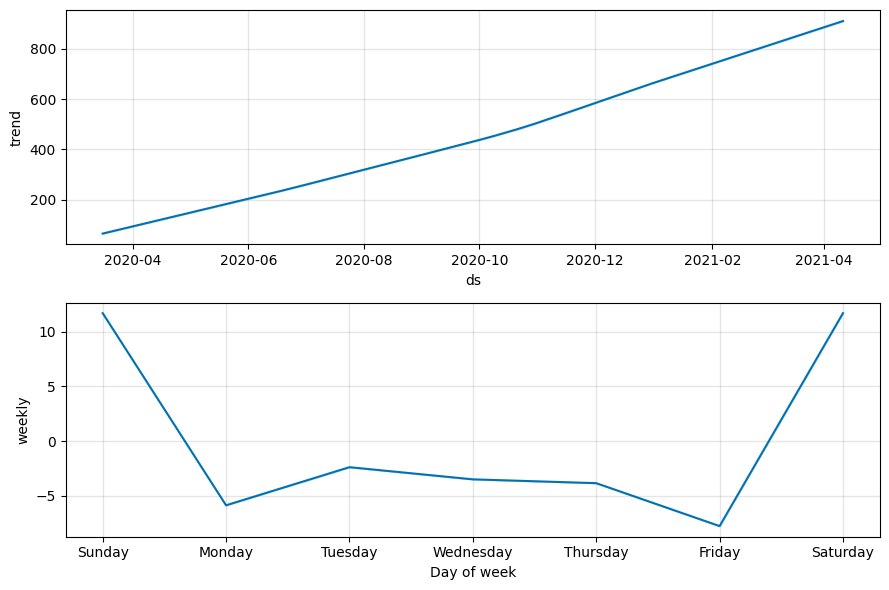

In [ ]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>